In [9]:
import MachineLearning_Adaline as AdalineGD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
                ,header=None,)

In [26]:
y = df.iloc[0:100,4].values # rows 0 to 100, column 4
y = np.where(y == 'Iris-setosa', -1, 1) # change Iris-setosa values to -1 and everything else to 1

In [27]:
X = df.iloc[0:100, [0,2]].values

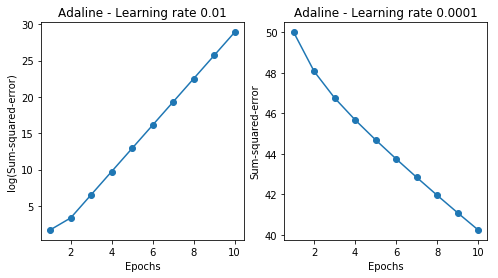

In [44]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))

ada1 = AdalineGD.AdalineGD(n_iter=10,eta=0.01).fit(X,y)

ax[0].plot(range(1,len(ada1.cost_) + 1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD.AdalineGD(n_iter=10, eta=0.0001).fit(X,y)

ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [45]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [46]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)

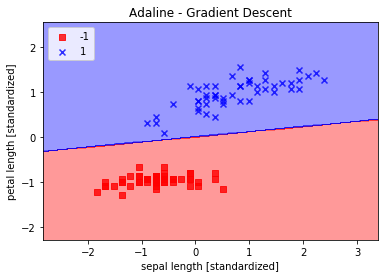

In [47]:
ada = AdalineGD.AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

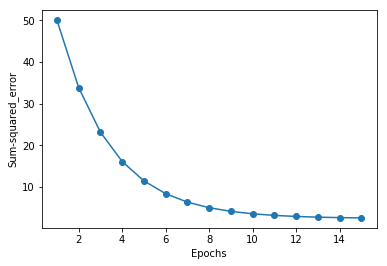

In [48]:
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared_error')
plt.show()